<a href="https://colab.research.google.com/github/monalisapatra26/ML4Science/blob/main/Classification/Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_csv("https://raw.githubusercontent.com/monalisapatra26/ML4Science/main/Classification/heart_disease.csv")
X = df.drop(columns="target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,
                                                    shuffle=True, random_state=0)

In [ ]:
dtclf = DecisionTreeClassifier(random_state=42)
dtclf.fit(X_train, y_train)
y_pred = dtclf.predict(X_test) # Predictions
y_true = y_test # True values

Train accuracy: 1.0
Test accuracy: 0.71

Test confusion_matrix


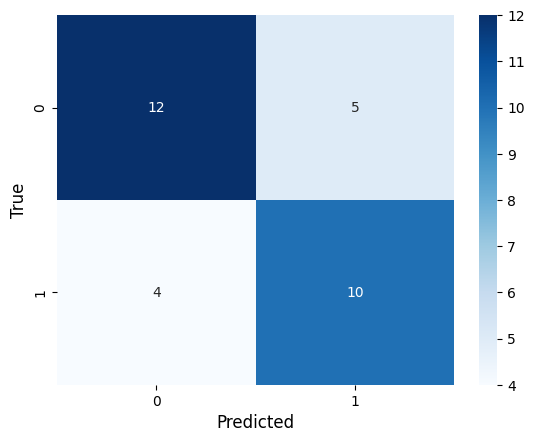

In [ ]:
print("Train accuracy:", np.round(accuracy_score(y_train,
                                                 dtclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

We can clearly see here that the Decision Tree model is tending to overfit. The hyperparameters in the decision tree classifier are:

1. criterion:{“gini”, “entropy”, “log_loss”}, default=”gini”
2. splitter{“best”, “random”}, default=”best”
3. max_depth: int, default=None.
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
4. min_samples_split: int or float, default=2
The minimum number of samples required to split an internal node
5. min_samples_leaf: int or float, default=1
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least

### Implement GridSearch CV:

1. estimator — (first parameter) A Scikit-learn machine learning model. In other words, this is our base model.
2. param_grid — A Python dictionary of search space. Our search space is 3-dimensional and contains 576 (9 x 8 x 8) different combinations. This means we train 576 different models with Grid Search!
3. scoring — The scoring method used to measure the models performance. For classification, we generally use ‘accuracy’ or ‘roc_auc’. For regression, ‘r2’ or ‘neg_mean_squared_error’ is preferred. Since our base model is a classification model (decision tree classifier), we use ‘accuracy’ as the scoring method.
4. n_jobs — This specifies the number of parallel jobs to be run when executing grid search. If your computer processor has many cores, set a higher value for this. The -1 value uses all available cores. This will speed up the execution process.
5. cv — The number of folds for cross-validation. The standard number are 5, 10. Each hyperparameter combination is repeated 10 times as cv is 10 here. So, the total number of iterations is 5760 (576 x 10).

Optimal hyperparameter combination: {'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 15}

Mean cross-validated training accuracy score: 0.7797619047619048
Test accuracy: 0.87
Execution time of Grid Search (in Seconds): 41.33580470085144



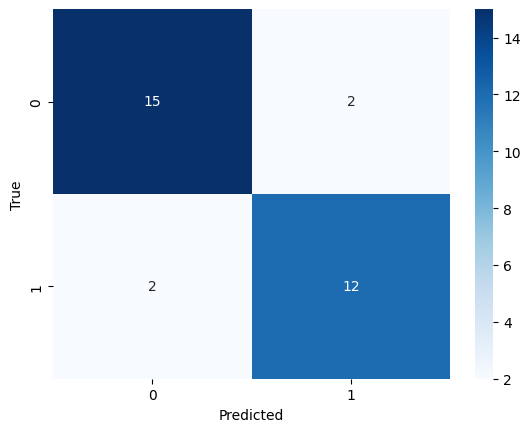

In [ ]:
# Let's measure execution time too
import time
start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20],
                        'min_samples_split':[2,4,6,8,10,15,20,30],
                        'min_samples_leaf':[1,2,3,4,5,6,8,10]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dtclf, param_grid=hyperparameter_space,
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", gs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      gs.best_score_)
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Grid Search (in Seconds):', diff)
print()

### Implementation of Random Search

The Python implementation of Random Search can be done using the Scikit-learn the RandomizedSearchCV function. Most of the parameters are the same as in the GridSearchCV function.

1. n_iter — Specifies the number of hyperparameter combinations to be selected randomly. This is because random search does not check all hyperparameter combinations defined in the search space. Instead, it considers only a random sample of combinations. Here, n_iter=10 means that it tasks a random sample of size 10 which contain 10 different hyperparameter combinations. Therefore, random search only trains 10 different models (previously, 576 models with Grid Search).
2. random_state — Controls the randomization of getting the sample of hyperparameter combinations at each different execution. We can use any integer.

Here, the total number of iterations is 100 (10 x 10) which is much less than in the previous case (5760 iterations). 10 is from CV

Optimal hyperparameter combination: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 15}

Mean cross-validated training accuracy score: 0.7797619047619048
Test accuracy: 0.87
Execution time of Random Search (in Seconds): 2.634603261947632



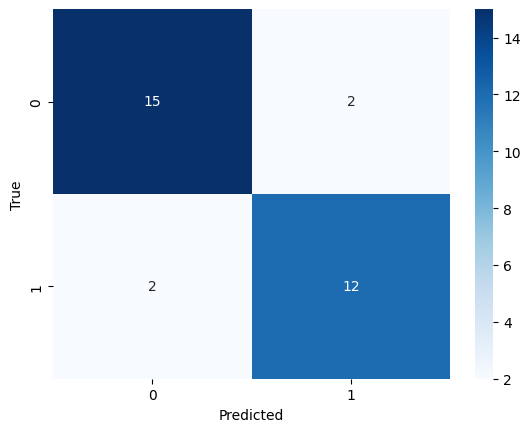

In [ ]:
# Let's measure execution time too
import time
start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20],
                        'min_samples_split':[2,4,6,8,10,15,20,30],
                        'min_samples_leaf':[1,2,3,4,5,6,8,10]}
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=10, return_train_score=True)

rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train)
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

The model performance is exactly the same as in Grid Search. However, optimal hyperparameter values are different. Now, the execution time is just 2.6 seconds which is much less than in the previous one (41 seconds). In this case, the random search is 16 times faster (41/2.6) than the grid search. This is because random search only performs 57.6 times (5760 / 100) fewer iterations!